In [1]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [2]:
# %cd /content/MyDrive/My Drive/Colab Notebooks/Machine_Learning_FinalProject

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import pickle as cPickle
import tensorflow as tf
import time

# tf.test.gpu_device_name()

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [5]:
categories = unpickle('batches.meta')

In [6]:
categories=categories['label_names']


In [7]:
categories

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
train_batch1=unpickle('data_batch_1')
train_batch2=unpickle('data_batch_2')
train_batch3=unpickle('data_batch_3')
train_batch4=unpickle('data_batch_4')
train_batch5=unpickle('data_batch_5')

In [9]:
train_b1=train_batch1['data']
train_b2=train_batch2['data']
train_b3=train_batch3['data']
train_b4=train_batch4['data']
train_b5=train_batch5['data']

# getting the labels of each batches 
batch1_labels=train_batch1['labels']
batch2_labels=train_batch2['labels']
batch3_labels=train_batch3['labels']
batch4_labels=train_batch4['labels']
batch5_labels=train_batch5['labels']

In [10]:
def reshaping(data):
    data=data.reshape(10000,3,32,32).transpose(0,2,3,1).astype("float")
    return data

In [11]:
# reshaping the batches
x_train1=reshaping(train_b1)
x_train2=reshaping(train_b2)
x_train3=reshaping(train_b3)
x_train4=reshaping(train_b4)
x_train5=reshaping(train_b5)

In [12]:
# checking the shape of each batch
print('Training batch1 shape:',x_train1.shape)
print('Training batch2 shape:',x_train2.shape)
print('Training batch3 shape:',x_train3.shape)
print('Training batch4 shape:',x_train4.shape)
print('Training batch5 shape:',x_train5.shape)


Training batch1 shape: (10000, 32, 32, 3)
Training batch2 shape: (10000, 32, 32, 3)
Training batch3 shape: (10000, 32, 32, 3)
Training batch4 shape: (10000, 32, 32, 3)
Training batch5 shape: (10000, 32, 32, 3)


In [13]:
# combining all these five batches of data and labels
X_train=np.concatenate((x_train1,x_train2,x_train3,x_train4,x_train5),axis=0)
y_train=np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)
# shapes of train set data and labels
print("shape of the Xtrain set :",X_train.shape)
print("Shape of the Ytrain set lables ",y_train.shape)

shape of the Xtrain set : (50000, 32, 32, 3)
Shape of the Ytrain set lables  (50000,)


In [14]:
# test set unpickle 
test_batch=unpickle('test_batch')
X_test_batch=test_batch["data"]
y_test=test_batch['labels']
X_test1=reshaping(X_test_batch)
# shapes of test set data and labels
print("shape of the Xtest set :",X_test1.shape)
print("Shape of the Ytest set lables ",np.shape(y_test))

shape of the Xtest set : (10000, 32, 32, 3)
Shape of the Ytest set lables  (10000,)


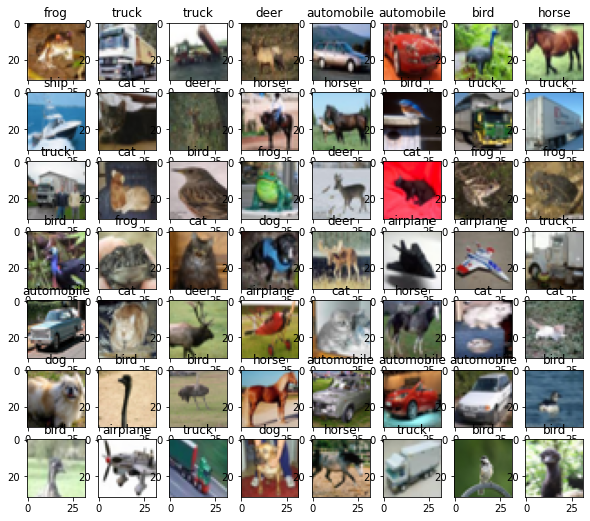

In [15]:

fig = plt.figure(figsize=(10,10))
for i in range(56):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(X_train[i].astype('uint8'), cmap = plt.cm.bone)
    plt.title(categories[y_train[i]])

plt.show()

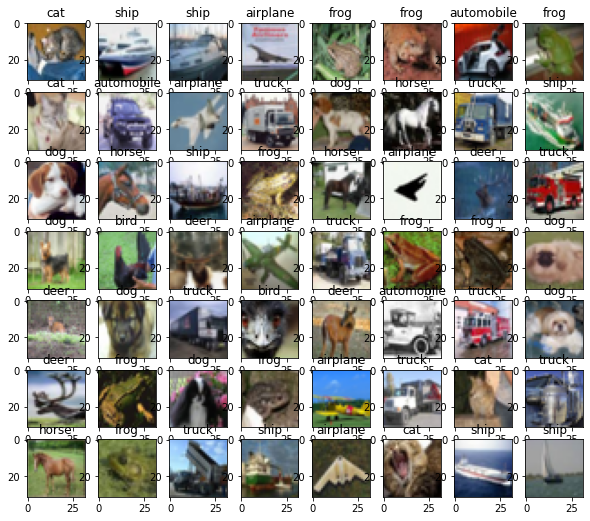

In [16]:
fig = plt.figure(figsize=(10,10))
for i in range(56):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(X_test1[i].astype('uint8'), cmap = plt.cm.bone)
    plt.title(categories[y_test[i]])

plt.show()

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.

X_test = np.reshape(X_test1, (X_test1.shape[0], -1))
print(X_train.shape) 
print(X_train[0])

(50000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]


In [18]:
#Normalizing by dividing t to 255
X_train=((X_train/255)*2)-1 
print(X_train.shape)
print(X_train[0])

(50000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [19]:
# splitting training_set into training and validation_set 15%
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=123)

In [20]:
print(" Train shape :",X_train.shape)
print(" Validation shape :",X_val.shape)
print(" Test shape :",X_test.shape)

 Train shape : (42500, 3072)
 Validation shape : (7500, 3072)
 Test shape : (10000, 3072)


In [21]:
%%time
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)


CPU times: user 3min 22s, sys: 7.63 s, total: 3min 29s
Wall time: 1min 16s


array([[ 9.50290546e+00, -1.32196471e+01, -1.19166589e+01, ...,
         2.17689441e-04, -3.11597630e-03, -2.37825939e-03],
       [ 3.56395312e+01,  7.18844864e+00,  2.20247178e+00, ...,
         2.49803751e-03,  1.23871731e-03,  2.91486607e-03],
       [ 2.74540103e+01, -1.04609146e+01,  1.08649056e+01, ...,
        -3.14152156e-03, -1.42049926e-03,  6.13966982e-04],
       ...,
       [ 1.86504628e+01,  5.30126626e+00, -2.49019411e+00, ...,
        -2.21961225e-03, -3.24240868e-03, -1.54348636e-03],
       [ 1.88528508e+01,  1.12926336e+01, -1.13648852e+01, ...,
        -5.91125615e-03, -5.81256481e-03, -3.06162159e-03],
       [ 2.76876072e+01, -1.44409134e+00,  8.58813389e+00, ...,
         1.13044235e-03, -6.17758726e-03, -1.02200789e-04]])

In [22]:
%%time
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

CPU times: user 2.24 ms, sys: 287 µs, total: 2.53 ms
Wall time: 2.9 ms


658

In [23]:
%%time
pca = PCA(n_components=k, whiten=True)

X_train_pca = pca.fit_transform(X_train)
var_exp = pca.explained_variance_ratio_
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)
print("Total variance explianed by ",k, "components:", var_exp.sum())

Total variance explianed by  658 components: 0.98987861151433
CPU times: user 2min 10s, sys: 10.2 s, total: 2min 20s
Wall time: 1min 1s


In [24]:
#Choosing a smaller dataset
# X_train_pca=X_train_pca[:100,:]
# y_train=y_train[:100]
# X_val_pca=X_val_pca[:50,:]
# y_val=y_val[:50]
# print(y_train)
# print(X_train.shape)
# print(y_train.shape)

In [25]:
%%time
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

def svm_linear(c):

    svc_model = LinearSVC( C = c,dual=False)
    
    svc_model.fit(X_train_pca, y_train.ravel()) 
    
    # Find the prediction and accuracy on the training set.

    train_prediction= svc_model.predict(X_train_pca)
    training_score = svc_model.score(X_train_pca,y_train )
    training_scores.append(training_score)
    print('Train Accuracy = {0:f}'.format(training_score))
    # Find the prediction and accuracy on the test set.
    val_prediction = svc_model.predict(X_val_pca)
    val_acc = accuracy_score(y_val,val_prediction)
    validation_accs.append(val_acc )
    print('Validation set Accuracy = {0:f}'.format(val_acc))
  

CPU times: user 227 µs, sys: 563 µs, total: 790 µs
Wall time: 1.16 ms


Train Accuracy = 0.443506
Validation set Accuracy = 0.406667
Train Accuracy = 0.446588
Validation set Accuracy = 0.405200
Train Accuracy = 0.447247
Validation set Accuracy = 0.405600
Train Accuracy = 0.447059
Validation set Accuracy = 0.405733
Train Accuracy = 0.447035
Validation set Accuracy = 0.405867
Train Accuracy = 0.447035
Validation set Accuracy = 0.405867
Train Accuracy = 0.447035
Validation set Accuracy = 0.405867
CPU times: user 2min 44s, sys: 4.18 s, total: 2min 48s
Wall time: 2min 48s


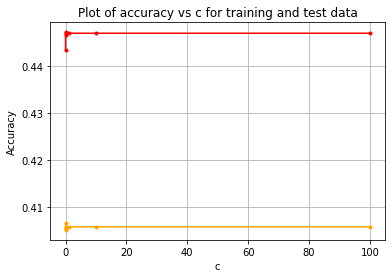

In [26]:
%%time
start = time.time()
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
training_scores = []
validation_accs = []

for c in c_svm_linear:
    svm_linear(c)
plt.plot(c_svm_linear, training_scores,'.-',color='red')
plt.plot(c_svm_linear, validation_accs,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()
end = time.time()

In [27]:
%%time
start_time = time.time()
svc_model = LinearSVC( C =0.001,dual=False)
    
svc_model.fit(X_train_pca, y_train.ravel()) 
    
# Find the prediction and accuracy on the training set.

train_prediction= svc_model.predict(X_train_pca)
training_score = svc_model.score(X_train_pca,y_train )
print('Train Accuracy = {0:f}'.format(training_score))
# Find the prediction and accuracy on the test set.
test_prediction = svc_model.predict(X_test_pca)
test_acc = accuracy_score(y_test,test_prediction)
print('Test set Accuracy = {0:f}'.format(test_acc))
print("Execution Time %s seconds: " % (time.time() - start_time))

Train Accuracy = 0.446588
Test set Accuracy = 0.307900
Execution Time 23.59746789932251 seconds: 
CPU times: user 23.3 s, sys: 539 ms, total: 23.8 s
Wall time: 23.6 s


In [28]:
from sklearn.metrics import classification_report
# classifcation report of svm classifier
predictions = svc_model.predict(X_test_pca)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.22      0.61      0.32      1000
           1       0.58      0.23      0.33      1000
           2       0.39      0.09      0.14      1000
           3       0.36      0.02      0.03      1000
           4       0.49      0.13      0.20      1000
           5       0.24      0.34      0.28      1000
           6       0.60      0.21      0.32      1000
           7       0.43      0.38      0.40      1000
           8       0.26      0.73      0.38      1000
           9       0.44      0.34      0.38      1000

    accuracy                           0.31     10000
   macro avg       0.40      0.31      0.28     10000
weighted avg       0.40      0.31      0.28     10000



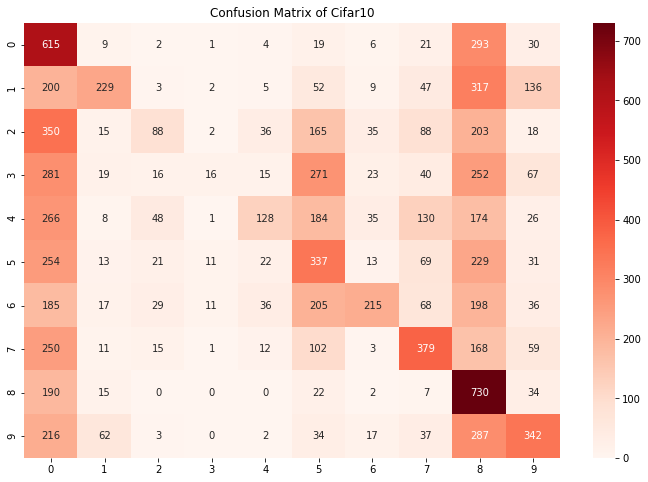

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(12,8))
plt.title("Confusion Matrix of Cifar10")
sns.heatmap(confusion_matrix(y_test, predictions), fmt="d",cmap='Reds',annot = True)

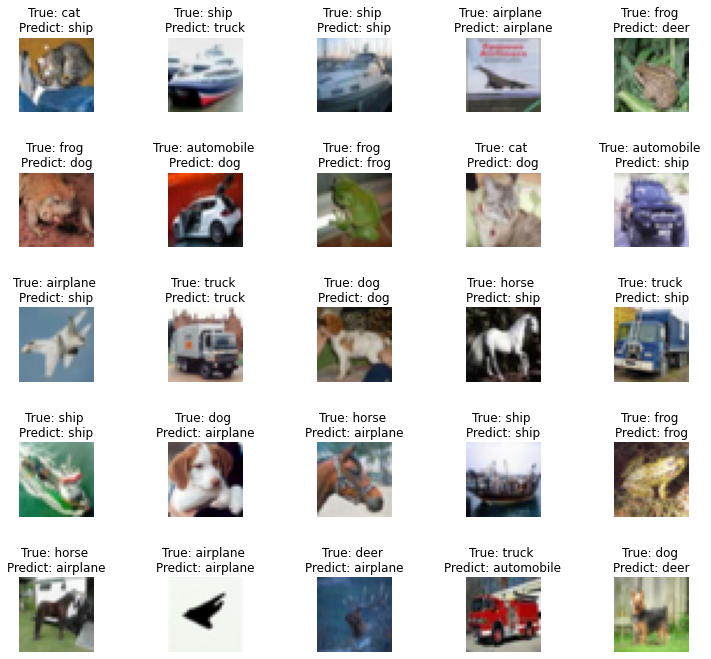

In [30]:

R = 5
C = 5
# X_test1=reshaping(X_test)
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
#     ax = fig.add_subplot(8, 8, i+1)
    axes[i].imshow(X_test1[i].astype('uint8'), cmap = plt.cm.bone)
    axes[i].set_title("True: %s \nPredict: %s" % (categories[y_test[i]], categories[predictions[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
plt.show()
